# 5_Get_Market_Index_Data.ipynb

Merging the internal and external data to look for correlation.

In [1]:
# importing the librarIES
import os                           # For file processing.
import csv
import pandas as pd            # For dataframes.
from pathlib import Path
import pyodbc                       # For connecting to SQL Server
import datetime
import numpy
import psutil 
import gc
import hashlib

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

# For the Yahoo Finance api
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

## Set all runtime variables.

In [69]:
e = datetime.datetime.now()
print ("Current date and time = %s" % e)
print ("Current memory available = ",psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

# File names
# Set values for the various paths.
merged_path = ".\data\merged"

# Set values for the various file extension types.
out_file_type = ".csv"

# Set values for the various file prefixes.
merged_file_prefix = "Policy_Fund_Agg_"

Full_History_Filename = 'C:/Users/m033\MSc\Big_Data_Project\data\output/Full_History_Fund_Data.csv'
Switches_By_Month = 'C:/Users/m033\MSc\Big_Data_Project\data\output/Switches_By_Month.csv'
Index_Data = r'C:/Users/m033\MSc\Big_Data_Project\data\azure/Market_Index_Data.csv'


# Set the date range.
v_start="2021-01-30"
v_end="2023-03-30"

Current date and time = 2023-04-22 17:44:32.376919
Current memory available =  29.575771619876196


# 1. Add in the Yahoo Finance Index data.

The following market and volatility indices are relevant from the perspective of our market analysts.

Use the same timeline as the internal data for correlation - 2022-01 to 2023-03


# 2. Market indices

## Equity:

### -	DAX Performance Index (Yahoo ticker: ^GDAXI)

In [70]:
df_DAX_index = pdr.get_data_yahoo("^GDAXI", start=v_start, end=v_end)
df_DAX_index['Index'] = "DAX"
df_DAX_index['Index_Type'] = "Equity"
df_DAX_index['Index_Description'] = "DAX Performance Index"
df_DAX_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,13559.940430,13648.049805,13518.450195,13622.019531,13622.019531,65321300,DAX,Equity,DAX Performance Index
2021-02-02,13724.120117,13844.940430,13693.929688,13835.160156,13835.160156,78714700,DAX,Equity,DAX Performance Index
2021-02-03,13986.719727,13988.150391,13866.389648,13933.629883,13933.629883,82152900,DAX,Equity,DAX Performance Index
2021-02-04,13971.940430,14069.889648,13955.700195,14060.290039,14060.290039,83865200,DAX,Equity,DAX Performance Index
2021-02-05,14061.690430,14114.440430,14013.129883,14056.719727,14056.719727,76254800,DAX,Equity,DAX Performance Index


### -	Dow Jones Industrial Average (Yahoo ticker: ^DJI)

In [71]:
df_DJI_index = pdr.get_data_yahoo("^DJI", start=v_start, end=v_end)
df_DJI_index['Index'] = "DJI"
df_DJI_index['Index_Type'] = "Equity"
df_DJI_index['Index_Description'] = "Dow Jones Industrial Average"
df_DJI_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,30054.730469,30335.910156,30014.970703,30211.910156,30211.910156,347060000,DJI,Equity,Dow Jones Industrial Average
2021-02-02,30276.880859,30840.539062,30276.880859,30687.480469,30687.480469,333160000,DJI,Equity,Dow Jones Industrial Average
2021-02-03,30689.650391,30793.410156,30521.310547,30723.599609,30723.599609,305590000,DJI,Equity,Dow Jones Industrial Average
2021-02-04,30737.779297,31065.960938,30737.779297,31055.859375,31055.859375,338330000,DJI,Equity,Dow Jones Industrial Average
2021-02-05,31093.810547,31252.179688,31083.220703,31148.240234,31148.240234,293550000,DJI,Equity,Dow Jones Industrial Average


### -	S&P 500 (Yahoo ticker: ^GSPC)

In [72]:
df_GSPC_index = pdr.get_data_yahoo("^GSPC", start=v_start, end=v_end)
df_GSPC_index['Index'] = "GSPC"
df_GSPC_index['Index_Type'] = "Equity"
df_GSPC_index['Index_Description'] = "S&P 500"
df_GSPC_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,3731.169922,3784.320068,3725.620117,3773.860107,3773.860107,5436230000,GSPC,Equity,S&P 500
2021-02-02,3791.840088,3843.090088,3791.840088,3826.310059,3826.310059,5514090000,GSPC,Equity,S&P 500
2021-02-03,3840.270020,3847.510010,3816.679932,3830.169922,3830.169922,4864870000,GSPC,Equity,S&P 500
2021-02-04,3836.659912,3872.419922,3836.659912,3871.739990,3871.739990,4879240000,GSPC,Equity,S&P 500
2021-02-05,3878.300049,3894.560059,3874.929932,3886.830078,3886.830078,4879470000,GSPC,Equity,S&P 500


### -	NASDAQ 100 (Yahoo ticker: ^NDX)

In [73]:
df_NDX_index = pdr.get_data_yahoo("^NDX", start=v_start, end=v_end)
df_NDX_index['Index'] = "NDX"
df_NDX_index['Index_Type'] = "Equity"
df_NDX_index['Index_Description'] = "NASDAQ 100"
df_NDX_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,13067.650391,13280.219727,12983.099609,13248.900391,13248.900391,7092520000,NDX,Equity,NASDAQ 100
2021-02-02,13371.370117,13501.230469,13363.759766,13456.120117,13456.120117,7325270000,NDX,Equity,NASDAQ 100
2021-02-03,13555.030273,13561.450195,13400.080078,13402.370117,13402.370117,7546940000,NDX,Equity,NASDAQ 100
2021-02-04,13454.849609,13563.129883,13406.440430,13560.889648,13560.889648,7295370000,NDX,Equity,NASDAQ 100
2021-02-05,13592.769531,13642.959961,13527.809570,13603.959961,13603.959961,6792910000,NDX,Equity,NASDAQ 100


### -	FTSE 100 (Yahoo ticker: ^FTSE)

In [74]:
df_FTSE_index = pdr.get_data_yahoo("^FTSE", start=v_start, end=v_end)
df_FTSE_index['Index'] = "FTSE"
df_FTSE_index['Index_Type'] = "Equity"
df_FTSE_index['Index_Description'] = "FTSE 100"
df_FTSE_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,6407.500000,6495.600098,6407.500000,6466.399902,6466.399902,746038100,FTSE,Equity,FTSE 100
2021-02-02,6466.399902,6523.500000,6466.399902,6516.700195,6516.700195,719054200,FTSE,Equity,FTSE 100
2021-02-03,6516.700195,6573.100098,6489.500000,6507.799805,6507.799805,717525200,FTSE,Equity,FTSE 100
2021-02-04,6507.799805,6553.399902,6478.200195,6503.700195,6503.700195,989919900,FTSE,Equity,FTSE 100
2021-02-05,6503.700195,6518.700195,6457.600098,6489.299805,6489.299805,984403300,FTSE,Equity,FTSE 100


### -	STOXX 50 Europe (Yahoo ticker: ^STOXX50E)

In [75]:
df_STOXX50E_index = pdr.get_data_yahoo("^STOXX50E", start=v_start, end=v_end)
df_STOXX50E_index['Index'] = "^STOXX50E"
df_STOXX50E_index['Index_Type'] = "Equity"
df_STOXX50E_index['Index_Description'] = "STOXX 50 Europe"
df_STOXX50E_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,3492.860107,3543.179932,3492.860107,3530.850098,3530.850098,30791900,^STOXX50E,Equity,STOXX 50 Europe
2021-02-02,3545.090088,3596.199951,3545.090088,3590.459961,3590.459961,39362600,^STOXX50E,Equity,STOXX 50 Europe
2021-02-03,3599.760010,3632.669922,3599.360107,3609.750000,3609.750000,56215100,^STOXX50E,Equity,STOXX 50 Europe
2021-02-04,3604.620117,3644.639893,3604.620117,3642.120117,3642.120117,47389500,^STOXX50E,Equity,STOXX 50 Europe
2021-02-05,3642.689941,3668.399902,3642.280029,3655.770020,3655.770020,56119600,^STOXX50E,Equity,STOXX 50 Europe


### -	NIKKEI 225 (Yahoo ticker: ^N225)

In [76]:
df_N225_index = pdr.get_data_yahoo("^N225", start=v_start, end=v_end)
df_N225_index['Index'] = "N225"
df_N225_index['Index_Type'] = "Equity"
df_N225_index['Index_Description'] = "NIKKEI 225"
df_N225_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,27649.070312,28107.099609,27649.070312,28091.050781,28091.050781,65700000,N225,Equity,NIKKEI 225
2021-02-02,28207.480469,28379.310547,28089.119141,28362.169922,28362.169922,67500000,N225,Equity,NIKKEI 225
2021-02-03,28482.710938,28669.949219,28402.300781,28646.500000,28646.500000,84000000,N225,Equity,NIKKEI 225
2021-02-04,28557.460938,28600.220703,28325.890625,28341.949219,28341.949219,81100000,N225,Equity,NIKKEI 225
2021-02-05,28631.460938,28785.710938,28548.269531,28779.189453,28779.189453,93200000,N225,Equity,NIKKEI 225


###  -	Hang Seng (Yahoo ticker: ^HIS)

In [77]:
df_HIS_index = pdr.get_data_yahoo("^HIS", start=v_start, end=v_end)
df_HIS_index['Index'] = "HIS"
df_HIS_index['Index_Type'] = "Equity"
df_HIS_index['Index_Description'] = "Hang Seng"
df_HIS_index.head(5)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^HIS: No data found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,


## Some corresponding Futures:

### -	S&P 500 Futures (Yahoo ticker: ES=F)

In [78]:
df_ESF_index = pdr.get_data_yahoo("ES=F", start=v_start, end=v_end)
df_ESF_index['Index'] = "ES=F"
df_ESF_index['Index_Type'] = "Futures"
df_ESF_index['Index_Description'] = "S&P 500 Futures"
df_ESF_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,3692.25,3777.00,3656.50,3765.75,3765.75,1687396,ES=F,Futures,S&P 500 Futures
2021-02-02,3764.75,3835.75,3760.00,3818.25,3818.25,1419765,ES=F,Futures,S&P 500 Futures
2021-02-03,3829.50,3843.50,3807.75,3823.50,3823.50,1285692,ES=F,Futures,S&P 500 Futures
2021-02-04,3832.75,3869.75,3811.25,3864.50,3864.50,1136404,ES=F,Futures,S&P 500 Futures
2021-02-05,3864.25,3888.25,3860.00,3880.25,3880.25,1138874,ES=F,Futures,S&P 500 Futures


### -	NASDAQ Futures (Yahoo ticker: NQ=F)

In [79]:
df_NQF_index = pdr.get_data_yahoo("NQ=F", start=v_start, end=v_end)
df_NQF_index['Index'] = "NQ=F"
df_NQF_index['Index_Type'] = "Futures"
df_NQF_index['Index_Description'] = "NASDAQ Futures"
df_NQF_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,12849.0,13271.50,12727.25,13236.50,13236.50,549549,NQ=F,Futures,NASDAQ Futures
2021-02-02,13232.5,13509.75,13230.50,13449.00,13449.00,491671,NQ=F,Futures,NASDAQ Futures
2021-02-03,13506.0,13584.50,13386.75,13394.25,13394.25,499098,NQ=F,Futures,NASDAQ Futures
2021-02-04,13429.5,13568.75,13345.25,13547.50,13547.50,408023,NQ=F,Futures,NASDAQ Futures
2021-02-05,13560.0,13638.50,13519.50,13598.00,13598.00,431935,NQ=F,Futures,NASDAQ Futures


### -	Dow Futures (Yahoo ticker: YM=F)

In [80]:
df_YMF_index = pdr.get_data_yahoo("YM=F", start=v_start, end=v_end)
df_YMF_index['Index'] = "YM=F"
df_YMF_index['Index_Type'] = "Futures"
df_YMF_index['Index_Description'] = "Dow Futures"
df_YMF_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,29810.0,30235.0,29552.0,30110.0,30110.0,170384,YM=F,Futures,Dow Futures
2021-02-02,30122.0,30738.0,30070.0,30586.0,30586.0,153450,YM=F,Futures,Dow Futures
2021-02-03,30609.0,30720.0,30412.0,30627.0,30627.0,130699,YM=F,Futures,Dow Futures
2021-02-04,30694.0,30990.0,30542.0,30950.0,30950.0,114243,YM=F,Futures,Dow Futures
2021-02-05,30968.0,31149.0,30924.0,31042.0,31042.0,120889,YM=F,Futures,Dow Futures


## ETFs:

ETFs are often popular for investors. ETFs are index funds that track a basket of securities of an index, i.e. these type of products tries to match the market return.  A lot of investors compares these ETFs with other funds in terms of performance and cost (ETFs are normally cheaper than an active fund). From my perspective the most popular indices being used in ETFs are the ones from MSCI, e.g. MSCI World. So I would suggest to include the following ETFs:

### -	iShares Core MSCI World UCITS ETF USD (Acc) (Yahoo ticker: EUNL.DE)

In [81]:
df_EUNLDE_index = pdr.get_data_yahoo("EUNL.DE", start=v_start, end=v_end)
df_EUNLDE_index['Index'] = "EUNL.DE"
df_EUNLDE_index['Index_Type'] = "ETFs"
df_EUNLDE_index['Index_Description'] = "iShares Core MSCI World UCITS ETF USD (Acc) "
df_EUNLDE_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,60.362000,60.764000,60.200001,60.750000,60.750000,574013,EUNL.DE,ETFs,iShares Core MSCI World UCITS ETF USD (Acc)
2021-02-02,61.282001,62.090000,61.240002,62.056000,62.056000,462054,EUNL.DE,ETFs,iShares Core MSCI World UCITS ETF USD (Acc)
2021-02-03,62.377998,62.389999,61.942001,62.077999,62.077999,183073,EUNL.DE,ETFs,iShares Core MSCI World UCITS ETF USD (Acc)
2021-02-04,62.166000,62.683998,62.122002,62.683998,62.683998,316367,EUNL.DE,ETFs,iShares Core MSCI World UCITS ETF USD (Acc)
2021-02-05,63.018002,63.200001,62.700001,62.880001,62.880001,361417,EUNL.DE,ETFs,iShares Core MSCI World UCITS ETF USD (Acc)


### -	iShares MSCI Emerging Markets ETF (Yahoo ticker: EEM)

In [82]:
df_EEM_index = pdr.get_data_yahoo("EEM", start=v_start, end=v_end)
df_EEM_index['Index'] = "EEM"
df_EEM_index['Index_Type'] = "ETFs"
df_EEM_index['Index_Description'] = "iShares MSCI Emerging Markets ETF"
df_EEM_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,54.419998,54.849998,54.160000,54.750000,52.460777,51427000,EEM,ETFs,iShares MSCI Emerging Markets ETF
2021-02-02,55.549999,55.590000,55.290001,55.459999,53.141087,33172200,EEM,ETFs,iShares MSCI Emerging Markets ETF
2021-02-03,55.830002,55.950001,55.570000,55.740002,53.409386,32363100,EEM,ETFs,iShares MSCI Emerging Markets ETF
2021-02-04,55.680000,55.799999,55.340000,55.759998,53.428543,40161800,EEM,ETFs,iShares MSCI Emerging Markets ETF
2021-02-05,56.009998,56.259998,55.799999,56.240002,53.888481,24242300,EEM,ETFs,iShares MSCI Emerging Markets ETF


## Bond:

### -	REX-Index (Yahoo ticker: REX.DE)

In [83]:
df_REXDE_index = pdr.get_data_yahoo("REX.DE", start=v_start, end=v_end)
df_REXDE_index['Index'] = "REX.DE"
df_REXDE_index['Index_Type'] = "Bond"
df_REXDE_index['Index_Description'] = "REX-Index "
df_REXDE_index.head(5)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- REX.DE: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,


### -	Bloomberg Barcalys Global Aggregate Bond 

(not directly available in yahoo, use the following ETF instead with the yahoo ticker SPFE.DE)


In [84]:
df_SPFEDE_index = pdr.get_data_yahoo("SPFE.DE", start=v_start, end=v_end)
df_SPFEDE_index['Index'] = "SPFE.DE"
df_SPFEDE_index['Index_Type'] = "Bond"
df_SPFEDE_index['Index_Description'] = "Bloomberg Barcalys Global Aggregate Bond "
df_SPFEDE_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,31.327999,31.372000,31.319000,31.355000,31.355000,2067,SPFE.DE,Bond,Bloomberg Barcalys Global Aggregate Bond
2021-02-02,31.349001,31.350000,31.263000,31.318001,31.318001,10094,SPFE.DE,Bond,Bloomberg Barcalys Global Aggregate Bond
2021-02-03,31.313000,31.320999,31.275000,31.298000,31.298000,1653,SPFE.DE,Bond,Bloomberg Barcalys Global Aggregate Bond
2021-02-04,31.306000,31.306000,31.257000,31.294001,31.294001,4415,SPFE.DE,Bond,Bloomberg Barcalys Global Aggregate Bond
2021-02-05,31.285999,31.298000,31.209999,31.242001,31.242001,1801,SPFE.DE,Bond,Bloomberg Barcalys Global Aggregate Bond


## Commodities:

### -	Gold (Yahoo ticker: GC=F)

In [85]:
df_GCF_index = pdr.get_data_yahoo("GC=F", start=v_start, end=v_end)
df_GCF_index['Index'] = "GC=F"
df_GCF_index['Index_Type'] = "Commodities"
df_GCF_index['Index_Description'] = "Gold"
df_GCF_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,1866.599976,1871.900024,1850.000000,1860.800049,1860.800049,1494,GC=F,Commodities,Gold
2021-02-02,1859.599976,1861.300049,1827.599976,1830.500000,1830.500000,1293,GC=F,Commodities,Gold
2021-02-03,1834.800049,1842.400024,1829.800049,1832.199951,1832.199951,1195,GC=F,Commodities,Gold
2021-02-04,1832.199951,1832.199951,1782.800049,1788.900024,1788.900024,2375,GC=F,Commodities,Gold
2021-02-05,1794.300049,1813.500000,1790.900024,1810.900024,1810.900024,1278,GC=F,Commodities,Gold


### -	Crude Oil (Yahoo ticker: CL=F)

In [86]:
df_CLF_index = pdr.get_data_yahoo("CL=F", start=v_start, end=v_end)
df_CLF_index['Index'] = "CL=F"
df_CLF_index['Index_Type'] = "Commodities"
df_CLF_index['Index_Description'] = "Crude Oil"
df_CLF_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,51.990002,53.740002,51.639999,53.549999,53.549999,416067,CL=F,Commodities,Crude Oil
2021-02-02,53.480000,55.259998,53.450001,54.759998,54.759998,463718,CL=F,Commodities,Crude Oil
2021-02-03,55.049999,56.330002,54.810001,55.689999,55.689999,448693,CL=F,Commodities,Crude Oil
2021-02-04,55.959999,56.580002,55.299999,56.230000,56.230000,381404,CL=F,Commodities,Crude Oil
2021-02-05,56.459999,57.290001,56.430000,56.849998,56.849998,400833,CL=F,Commodities,Crude Oil


### -	Natural Gas (Yahoo ticker: NG=F)

In [87]:
df_NGF_index = pdr.get_data_yahoo("NG=F", start=v_start, end=v_end)
df_NGF_index['Index'] = "NG=F"
df_NGF_index['Index_Type'] = "Commodities"
df_NGF_index['Index_Description'] = "Natural Gas"
df_NGF_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,2.730,2.868,2.712,2.850,2.850,243658,NG=F,Commodities,Natural Gas
2021-02-02,2.829,3.005,2.811,2.845,2.845,236392,NG=F,Commodities,Natural Gas
2021-02-03,2.827,2.894,2.748,2.789,2.789,158484,NG=F,Commodities,Natural Gas
2021-02-04,2.776,2.977,2.734,2.935,2.935,186926,NG=F,Commodities,Natural Gas
2021-02-05,2.957,3.057,2.851,2.863,2.863,270029,NG=F,Commodities,Natural Gas


## Currencies:

### -	EUR/USD (Yahoo ticker: EURUSD=X)

In [88]:
df_EURUSDX_index = pdr.get_data_yahoo("EURUSD=X", start=v_start, end=v_end)
df_EURUSDX_index['Index'] = "EURUSD=X"
df_EURUSDX_index['Index_Type'] = "Currencies"
df_EURUSDX_index['Index_Description'] = "EUR/USD"
df_EURUSDX_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,1.212283,1.213607,1.206913,1.212386,1.212386,0,EURUSD=X,Currencies,EUR/USD
2021-02-02,1.206768,1.208795,1.201836,1.206869,1.206869,0,EURUSD=X,Currencies,EUR/USD
2021-02-03,1.203905,1.204999,1.200495,1.203905,1.203905,0,EURUSD=X,Currencies,EUR/USD
2021-02-04,1.204181,1.204384,1.196716,1.204239,1.204239,0,EURUSD=X,Currencies,EUR/USD
2021-02-05,1.196745,1.203978,1.195357,1.196673,1.196673,0,EURUSD=X,Currencies,EUR/USD


### -	EUR/GBP (Yahoo ticker: EURGBP=X)

In [89]:
df_EURGBPX_index = pdr.get_data_yahoo("EURGBP=X", start=v_start, end=v_end)
df_EURGBPX_index['Index'] = "EURGBP=X"
df_EURGBPX_index['Index_Type'] = "Currencies"
df_EURGBPX_index['Index_Description'] = "EUR/GBP"
df_EURGBPX_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,0.88493,0.88510,0.88044,0.88504,0.88504,0,EURGBP=X,Currencies,EUR/GBP
2021-02-02,0.88240,0.88347,0.87940,0.88233,0.88233,0,EURGBP=X,Currencies,EUR/GBP
2021-02-03,0.88100,0.88220,0.87970,0.88123,0.88123,0,EURGBP=X,Currencies,EUR/GBP
2021-02-04,0.88212,0.88389,0.87515,0.88230,0.88230,0,EURGBP=X,Currencies,EUR/GBP
2021-02-05,0.87516,0.87763,0.87381,0.87495,0.87495,0,EURGBP=X,Currencies,EUR/GBP


### -	USD/GBP (Yahoo ticker: GBPUSD=X)

In [90]:
df_GBPUSDX_index = pdr.get_data_yahoo("GBPUSD=X", start=v_start, end=v_end)
df_GBPUSDX_index['Index'] = "GBPUSD=X"
df_GBPUSDX_index['Index_Type'] = "Currencies"
df_GBPUSDX_index['Index_Description'] = "USD/GBP"
df_GBPUSDX_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,1.369807,1.375686,1.365803,1.369769,1.369769,0,GBPUSD=X,Currencies,USD/GBP
2021-02-02,1.367559,1.370952,1.361359,1.367877,1.367877,0,GBPUSD=X,Currencies,USD/GBP
2021-02-03,1.366214,1.368232,1.362101,1.365934,1.365934,0,GBPUSD=X,Currencies,USD/GBP
2021-02-04,1.365039,1.369863,1.357147,1.364908,1.364908,0,GBPUSD=X,Currencies,USD/GBP
2021-02-05,1.367278,1.374004,1.366755,1.367615,1.367615,0,GBPUSD=X,Currencies,USD/GBP


# 3. Volatility indices

### -	VIX (Yahoo ticker: ^VIX)

In [91]:
df_VIX_index = pdr.get_data_yahoo("^VIX", start=v_start, end=v_end)
df_VIX_index['Index'] = "^VIX"
df_VIX_index['Index_Type'] = "Volatility"
df_VIX_index['Index_Description'] = "VIXx"
df_VIX_index.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,31.450001,33.959999,29.030001,30.240000,30.240000,0,^VIX,Volatility,VIXx
2021-02-02,28.010000,28.080000,25.309999,25.559999,25.559999,0,^VIX,Volatility,VIXx
2021-02-03,24.590000,25.430000,22.910000,22.910000,22.910000,0,^VIX,Volatility,VIXx
2021-02-04,23.440001,23.440001,21.680000,21.770000,21.770000,0,^VIX,Volatility,VIXx
2021-02-05,21.990000,22.160000,20.860001,20.870001,20.870001,0,^VIX,Volatility,VIXx


### -	VSTOXX (Yahoo ticker: V2TX.DE)

In [92]:
df_V2TXDE_index = pdr.get_data_yahoo("V2TX.DE", start=v_start, end=v_end)
df_V2TXDE_index['Index'] = "V2TX.DE"
df_V2TXDE_index['Index_Type'] = "Volatility"
df_V2TXDE_index['Index_Description'] = "VSTOXX"
df_V2TXDE_index.head(5)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- V2TX.DE: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,


### -	VDAX-New (Yahoo ticker: V1X.DE)

In [93]:
df_V1XDE_index = pdr.get_data_yahoo("VDAX-NEW", start=v_start, end=v_end)
df_V1XDE_index = pdr.get_data_yahoo("V1DX1", start=v_start, end=v_end)
df_V1XDE_index = pdr.get_data_yahoo("V1X.DE", start=v_start, end=v_end)
df_V1XDE_index['Index'] = "V1X.DE"
df_V1XDE_index['Index_Type'] = "Volatility"
df_V1XDE_index['Index_Description'] = "VDAX-New"
df_V1XDE_index.head(5)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VDAX-NEW: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- V1DX1: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- V1X.DE: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,


# 4. Merge all dataframes

### List all dataframes to concatenate them

In [94]:
%whos DataFrame

Variable            Type         Data/Info
------------------------------------------
df_CLF_index        DataFrame                     Open    <...>n\n[547 rows x 9 columns]
df_DAX_index        DataFrame                        Open <...>n\n[555 rows x 9 columns]
df_DJI_index        DataFrame                        Open <...>n\n[544 rows x 9 columns]
df_EEM_index        DataFrame                     Open    <...>n\n[544 rows x 9 columns]
df_ESF_index        DataFrame                   Open     H<...>n\n[547 rows x 9 columns]
df_EUNLDE_index     DataFrame                     Open    <...>n\n[555 rows x 9 columns]
df_EURGBPX_index    DataFrame                   Open     H<...>n\n[564 rows x 9 columns]
df_EURUSDX_index    DataFrame                    Open     <...>n\n[564 rows x 9 columns]
df_FTSE_index       DataFrame                       Open  <...>n\n[545 rows x 9 columns]
df_GBPUSDX_index    DataFrame                    Open     <...>n\n[564 rows x 9 columns]
df_GCF_index        Data

In [95]:
frames = [df_CLF_index,df_DAX_index,df_DJI_index,df_EEM_index,df_ESF_index,df_EUNLDE_index,df_EURGBPX_index,df_EURUSDX_index,
          df_FTSE_index,df_GBPUSDX_index,df_GCF_index,df_GSPC_index,df_HIS_index,df_N225_index,df_NDX_index,df_NGF_index,
          df_NQF_index,df_REXDE_index,df_SPFEDE_index,df_STOXX50E_index,df_V1XDE_index,df_V2TXDE_index,df_VIX_index,df_YMF_index]  

# Or perform operations on the DFs
df_concat_indices = pd.concat(frames)
df_concat_indices.head(5)

,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
Date,,,,,,,,,
2021-02-01,51.990002,53.740002,51.639999,53.549999,53.549999,416067.0,CL=F,Commodities,Crude Oil
2021-02-02,53.480000,55.259998,53.450001,54.759998,54.759998,463718.0,CL=F,Commodities,Crude Oil
2021-02-03,55.049999,56.330002,54.810001,55.689999,55.689999,448693.0,CL=F,Commodities,Crude Oil
2021-02-04,55.959999,56.580002,55.299999,56.230000,56.230000,381404.0,CL=F,Commodities,Crude Oil
2021-02-05,56.459999,57.290001,56.430000,56.849998,56.849998,400833.0,CL=F,Commodities,Crude Oil


In [96]:
#df_concat_indices['Date'] = df_concat_indices.index
#df_concat_indices.head(5)

In [97]:
df_concat_indices = df_concat_indices.sort_values(['Date','Index']).reset_index(drop=False)
df_concat_indices.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,Index,Index_Type,Index_Description
0,2021-02-01,51.990002,53.740002,51.639999,53.549999,53.549999,4.160670e+05,CL=F,Commodities,Crude Oil
1,2021-02-01,13559.940430,13648.049805,13518.450195,13622.019531,13622.019531,6.532130e+07,DAX,Equity,DAX Performance Index
2,2021-02-01,30054.730469,30335.910156,30014.970703,30211.910156,30211.910156,3.470600e+08,DJI,Equity,Dow Jones Industrial Average
3,2021-02-01,54.419998,54.849998,54.160000,54.750000,52.460777,5.142700e+07,EEM,ETFs,iShares MSCI Emerging Markets ETF
4,2021-02-01,3692.250000,3777.000000,3656.500000,3765.750000,3765.750000,1.687396e+06,ES=F,Futures,S&P 500 Futures
5,2021-02-01,60.362000,60.764000,60.200001,60.750000,60.750000,5.740130e+05,EUNL.DE,ETFs,iShares Core MSCI World UCITS ETF USD (Acc)
6,2021-02-01,0.884930,0.885100,0.880440,0.885040,0.885040,0.000000e+00,EURGBP=X,Currencies,EUR/GBP
7,2021-02-01,1.212283,1.213607,1.206913,1.212386,1.212386,0.000000e+00,EURUSD=X,Currencies,EUR/USD
8,2021-02-01,6407.500000,6495.600098,6407.500000,6466.399902,6466.399902,7.460381e+08,FTSE,Equity,FTSE 100
9,2021-02-01,1.369807,1.375686,1.365803,1.369769,1.369769,0.000000e+00,GBPUSD=X,Currencies,USD/GBP


https://towardsdatascience.com/calculate-and-plot-s-p-500-daily-returns-2ce359e014d6

<AxesSubplot:xlabel='Date'>

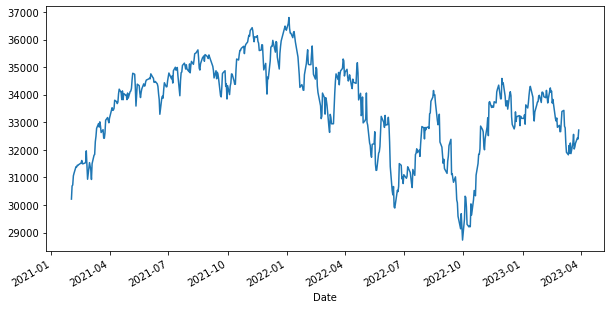

In [98]:
import matplotlib.pyplot as plt
df_DJI_index        ['Close'].plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

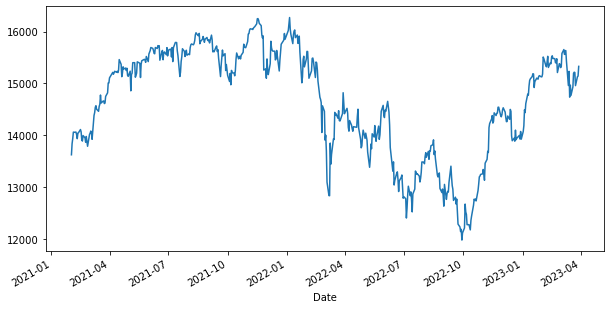

In [99]:
import matplotlib.pyplot as plt
df_DAX_index        ['Close'].plot(figsize=(10, 5))

In [100]:
import plotly.graph_objs as go
import yfinance as yf
choice = input("Write a stock symbol: ")
choice = choice.upper()
fig = go.Figure()
fig.add_trace(go.Candlestick(x=df_concat_indices.index,open = df_concat_indices["Open"], high=df_concat_indices["High"], low=df_concat_indices["Low"], close=df_concat_indices["Close"], name = "market data"))
fig.update_layout(title = choice + " share price", yaxis_title = "Stock Price (USD)")
fig.update_xaxes(
rangeslider_visible=True,
rangeselector=dict(
buttons=list([
])
)
)
fig.show()

Write a stock symbol: 


# 4. Write out index data for future use.

In [101]:
# Write to a csv file and use index=false to drop teh index from the dataframe
df_concat_indices.to_csv(Index_Data, encoding='utf-8', index=False)

In [103]:
df_concat_indices.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Adj Close                   float64
Volume                      float64
Index                        object
Index_Type                   object
Index_Description            object
dtype: object

In [ ]:
size the data to similar scale
Feature scaling


In [131]:
df_concat_indices.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Adj Close                   float64
Volume                      float64
Index                        object
Index_Type                   object
Index_Description            object
dtype: object

In [76]:
# download dataframe using pandas_datareader
df_DAX_index = pdr.get_data_yahoo("^GDAXI", start="2022-08-30", end="2023-03-30")
df_DAX_index

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-30,12919.429688,13154.150391,12885.080078,12961.139648,12961.139648,62479300
2022-08-31,13018.480469,13020.540039,12814.809570,12834.959961,12834.959961,82999700
2022-09-01,12713.750000,12743.049805,12603.580078,12630.230469,12630.230469,61602700
2022-09-02,12768.440430,13051.570312,12736.009766,13050.269531,13050.269531,67336800
2022-09-05,12827.580078,12827.580078,12617.400391,12760.780273,12760.780273,62869400
...,...,...,...,...,...,...
2023-03-23,15178.250000,15244.320312,15078.719727,15210.389648,15210.389648,82739800
2023-03-24,15135.500000,15135.650391,14809.820312,14957.230469,14957.230469,181078000
2023-03-27,15133.679688,15185.349609,15020.070312,15127.679688,15127.679688,90911900


In [85]:
# download dataframe using pandas_datareader
df_N225_index = pdr.get_data_yahoo("^SRVIX", start="2018-08-30", end="2023-03-30")
df_N225_index = pdr.get_summary_data("^SRVIX", start="2018-08-30", end="2023-03-30")


#df_N225_index

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^SRVIX: No data found for this date range, symbol may be delisted


AttributeError: module 'pandas_datareader.data' has no attribute 'get_summary_data'

# 7 Write out the enhanced data for future use.

In [407]:
# Write to a csv file and use index=false to drop teh index from the dataframe
df_switches.to_csv(Switches_Filename, encoding='utf-8', index=False)

In [408]:
#create new column titled 'Good'
df_switches['Switch1'] = np.where(df_switches['2022-08'], '2022-08', 'NaN')
df_switches['Switch2'] = np.where(df_switches['2022-09'], '2022-09', 'NaN')
df_switches['Switch3'] = np.where(df_switches['2022-10'], '2022-10', 'NaN')
df_switches['Switch4'] = np.where(df_switches['2022-11'], '2022-11', 'NaN')
df_switches['Switch5'] = np.where(df_switches['2022-12'], '2022-12', 'NaN')
df_switches['Switch6'] = np.where(df_switches['2023-01'], '2023-01', 'NaN')
df_switches['Switch7'] = np.where(df_switches['2023-02'], '2023-02', 'NaN')
df_switches['Switch8'] = np.where(df_switches['2023-03'], '2023-03', 'NaN')

#  Convert the columns to date-time
df_switches["Switch1"] = pd.to_datetime(df_switches["Switch1"])
df_switches["Switch2"] = pd.to_datetime(df_switches["Switch2"])
df_switches["Switch3"] = pd.to_datetime(df_switches["Switch3"])
df_switches["Switch4"] = pd.to_datetime(df_switches["Switch4"])
df_switches["Switch5"] = pd.to_datetime(df_switches["Switch5"])
df_switches["Switch6"] = pd.to_datetime(df_switches["Switch6"])
df_switches["Switch7"] = pd.to_datetime(df_switches["Switch7"])
df_switches["Switch8"] = pd.to_datetime(df_switches["Switch8"])

# Drop teh old columns
df_switches = df_switches.drop(columns=['2022-08','2022-09','2022-10','2022-11','2022-12','2023-01','2023-02','2023-03'])
df_switches

,POL_NUMB,202207,Switch1,Switch2,Switch3,Switch4,Switch5,Switch6,Switch7,Switch8
0,001045160#,TSDGBTSDITTSEETTSSITTSYGB,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,001045178#,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,001046154#,TSESS,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,001047062#,TSDGB,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,001049026#,TSESD,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
262012,8154017T,x,NaT,NaT,NaT,NaT,NaT,NaT,2023-02-01,2023-03-01
262013,8154029E,x,NaT,NaT,NaT,NaT,NaT,NaT,2023-02-01,2023-03-01
262014,8154039R,x,NaT,NaT,NaT,NaT,NaT,NaT,2023-02-01,2023-03-01
262015,8154079T,x,NaT,NaT,NaT,NaT,NaT,NaT,2023-02-01,2023-03-01


In [469]:
df_switches.loc[df_switches['2023-03'] == 'NaT', '2023-03'].count()

0

In [474]:
(df_switches['2023-03']=='NaT').sum()

0

In [476]:
df_switches['2023-03'].notnull().sum()

262017

In [477]:
df_switches['2023-02'].notnull().sum()

262017

In [478]:
df_switches.isnull().sum(axis=0)

POL_NUMB    0
202207      0
2022-08     0
2022-09     0
2022-10     0
2022-11     0
2022-12     0
2023-01     0
2023-02     0
2023-03     0
dtype: int64

In [409]:
df_switches.dtypes

POL_NUMB            object
202207              object
Switch1     datetime64[ns]
Switch2     datetime64[ns]
Switch3     datetime64[ns]
Switch4     datetime64[ns]
Switch5     datetime64[ns]
Switch6     datetime64[ns]
Switch7     datetime64[ns]
Switch8     datetime64[ns]
dtype: object

# 8 Write out the enhanced dates based timeline for future use.

In [410]:
# Write to a csv file and use index=false to drop teh index from the dataframe
df_switches.to_csv(Switches_Filename_Dates, encoding='utf-8', index=False)

In [503]:
my_df.dtypes

Date            object
Num_Switches     int64
dtype: object

<AxesSubplot:xlabel='Date'>

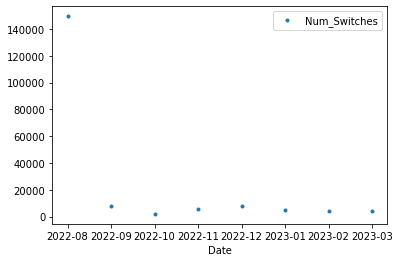

In [504]:
my_df.plot(x='Date', y='Num_Switches', style=".")

In [404]:
# Read the data into a pandas dataframe
df_switches = pd.read_csv(Switches_Filename, delimiter=',',low_memory=False, header=0)
df_switches

,POL_NUMB,202207,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
0,001045160#,TSDGBTSDITTSEETTSSITTSYGB,False,False,False,False,False,False,False,False
1,001045178#,TSDGBTSEAMTSEDETSEETTSESSTSSGBTSYGB,False,False,False,False,False,False,False,False
2,001046154#,TSESS,False,False,False,False,False,False,False,False
3,001047062#,TSDGB,False,False,False,False,False,False,False,False
4,001049026#,TSESD,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
262012,8154017T,x,False,False,False,False,False,False,True,True
262013,8154029E,x,False,False,False,False,False,False,True,True
262014,8154039R,x,False,False,False,False,False,False,True,True
262015,8154079T,x,False,False,False,False,False,False,True,True


In [293]:
df_switches['date'] = pd.to_datetime(dict(year='2022', month='08', day=df_switches.day))
df_switches

ValueError: If using all scalar values, you must pass an index

In [302]:
df = pd.DataFrame({'event':['01-08-2022']})
#df['event'] = pd.to_datetime(df['event'], dayfirst=True)
#df['months'] = df['event'].dt.to_period('M')




df['months'] = pd.to_datetime(df['event'], dayfirst=True).dt.to_period('M')
print (df)

        event   months
0  01-08-2022  2022-08


# 7. Plot the dataframe on a time plot.

In [287]:
# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

In [288]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  


<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

In [289]:
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df_switches['POL_NUMB'].plot(label='POL_NUMB', color='orange')
  
# adding title to the plot
plt.title('Open Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

TypeError: no numeric data to plot